In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from scipy.fft import fft, fftshift, fftfreq
# Carpeta de datos
data_folder = Path("data")
file_list = sorted(list(data_folder.glob("*.txt")))

print(f"Número de archivos encontrados: {len(file_list)}")

Número de archivos encontrados: 0


In [8]:
path = "/data/savnet/SAVNET_RAW_24h/"
files = !ls $path
files

['savnet_24h_p1.npy',
 'savnet_24h_p2.npy',
 'savnet_24h_p3.npy',
 'savnet_24h_p4.npy',
 'savnet_24h_p5.npy',
 'savnet_24h_PPS_p1.npy',
 'savnet_24h_PPS_p2.npy',
 'savnet_24h_PPS_p3.npy',
 'savnet_24h_PPS_p4.npy',
 'savnet_24h_PPS_p5.npy',
 'structinfo.txt']

In [9]:
files = ['savnet_24h_p1.npy',
         'savnet_24h_p2.npy',
         'savnet_24h_p3.npy',
         'savnet_24h_p4.npy',
         #'savnet_24h_p5.npy',
        ]

In [17]:
#archivosnum = len(file_list)  # Número máximo de archivos a procesar

# Inicializar arreglo para almacenar resultados FFT
FFT_IQ_SEG = []

fs = 96e3  # Frecuencia de muestreo
f0 = 24e3   # Frecuencia de interés
bw = 200    # Ancho de banda a analizar
wlen = int(fs)
fvec = fftfreq(wlen, 1/fs)[:int(wlen/2)]
idx_band = np.where((fvec >= (f0 - bw / 2)) & (fvec <= (f0 + bw / 2)))[0]
#fvec = np.arange(win_size) * (fs / win_size)

for file in files:
    #file_path = file_list[k]
    #print(f"Now reading {file_path}");
    signal = np.load(path+file, mmap_mode="r")
    len_signal = len(signal)
    nsecs = int(len_signal//fs)  
    print(f"file: {file}")
    for i in range(nsecs):
        #size_str = sizeIQ.decode(errors='ignore')
        #size_start = size_str.find("#size ")
        #size_end = size_str.find("\n", size_start)
        #sizefileIQ = size_str[size_start+6:size_end].strip()
        #sizedata = int(sizefileIQ)
        
        #I = np.fromfile(f, dtype=np.float32, count=sizedata)
        #Q = np.fromfile(f, dtype=np.float32, count=sizedata)
        #PPS = f.read(30)

        x = signal[i*wlen: (i+1)*wlen] #I + 1j * Q
        win_size = wlen
        N = win_size
        #fvec = np.arange(win_size) * (fs / win_size)
    
        # Índices en la banda [23.9kHz, 24.1kHz]
        
    
        # FFT
        X_win = fft(x)[:int(wlen/2)]
        NAAband = X_win[idx_band]
        X_mag = np.abs(NAAband)
    
        max_idx = np.argmax(X_mag)
        FFT_IQ_SEG.append(NAAband[max_idx])
        print(f"second : {i}", end="\r")
    #tail = 
    print("\n------")
# Convertir a numpy array
FFT_IQ_SEG = np.array(FFT_IQ_SEG)


file: savnet_24h_p1.npy
second : 20832
------
file: savnet_24h_p2.npy
second : 20832
------
file: savnet_24h_p3.npy
second : 20832
------
file: savnet_24h_p4.npy
second : 20832
------


In [2]:
2000001600//96e3

20833.0

In [23]:
# Asegúrate de que sea un array complejo
#FFT_IQ_SEG = np.array(FFT_IQ_SEG, dtype=np.complex64)

# Producto conjugado entre elementos consecutivos
fase_IQ_delta = FFT_IQ_SEG[1:] * np.conj(FFT_IQ_SEG[:-1])

# Inicializar el array de acumulación compleja
relative_phase = np.zeros(len(FFT_IQ_SEG))
relative_phase[0] = np.angle(FFT_IQ_SEG[0])
# Acumulación de productos complejos
for i in range(1, len(FFT_IQ_SEG)):
    relative_phase[i] = relative_phase[i-1] + np.angle(fase_IQ_delta[i-1])

# Obtener fase al final (si se desea)
angle_relative_phase = relative_phase #(np.angle(relative_phase))

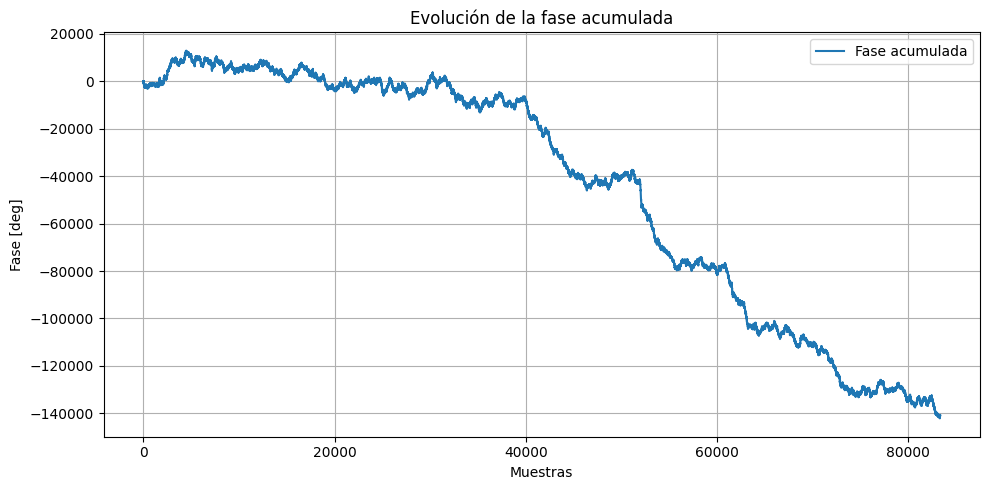

In [25]:
# Graficar
plt.figure(figsize=(10, 5))
plt.plot(np.unwrap(angle_relative_phase)*180/3.14, label='Fase acumulada')
#plt.plot(detrended_phase, label='Fase sin tendencia lineal')
plt.xlabel('Muestras')
plt.ylabel('Fase [deg]')
plt.title('Evolución de la fase acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
fase_IQ_delta
#plt.ylim(-100,100)
plt.show()


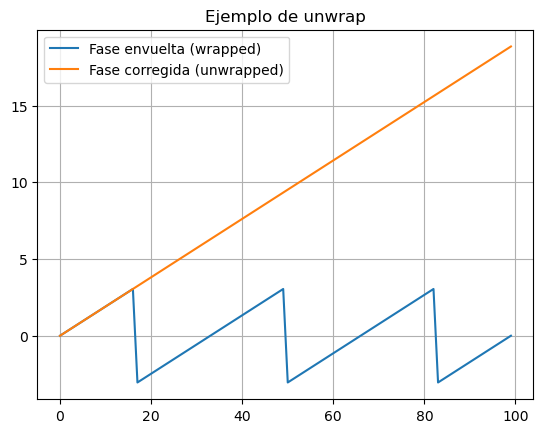

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Simulamos una fase creciente con saltos artificiales
angles = np.linspace(0, 6 * np.pi, 100)
wrapped = np.angle(np.exp(1j * angles))  # Simula el 'wrap'

unwrapped = np.unwrap(wrapped)

plt.plot(wrapped, label='Fase envuelta (wrapped)')
plt.plot(unwrapped, label='Fase corregida (unwrapped)')
plt.legend()
plt.title('Ejemplo de unwrap')
plt.grid(True)
plt.show()

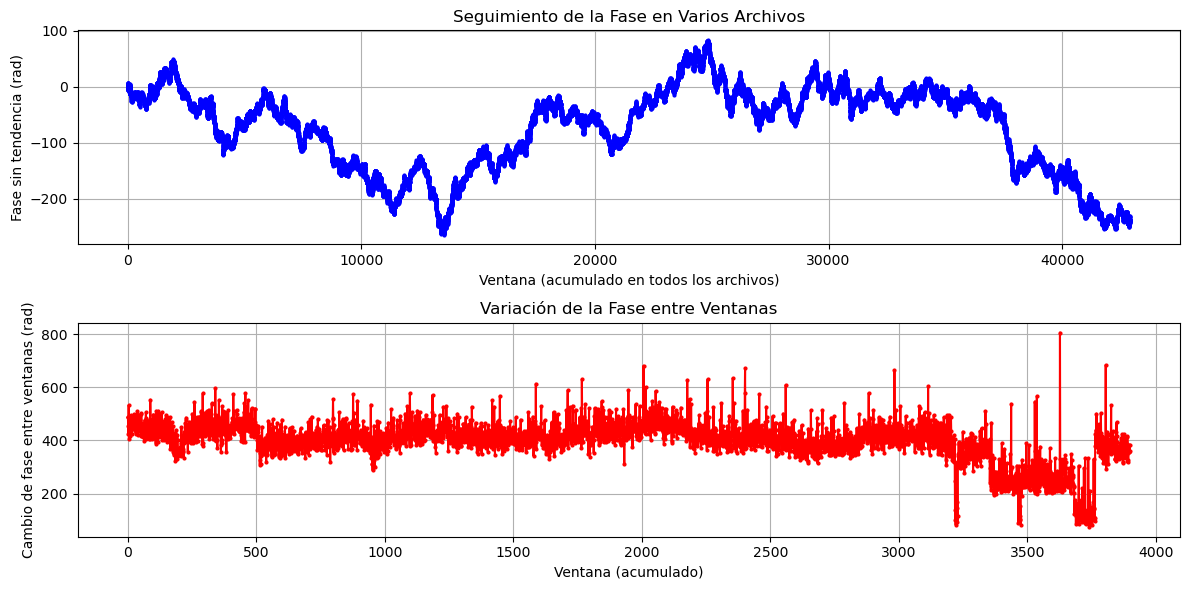

In [31]:
# Unwrap global de variación de fase
fase_seguimiento = np.unwrap(fase_total_delta)
delta_fase = np.diff(fase_seguimiento)

# Gráficas
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(fase_seguimiento, 'b-o', markersize=2)
plt.xlabel('Ventana (acumulado en todos los archivos)')
plt.ylabel('Fase sin tendencia (rad)')
plt.title('Seguimiento de la Fase en Varios Archivos')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(ampl_files, 'r-o', markersize=2)
plt.xlabel('Ventana (acumulado)')
plt.ylabel('Cambio de fase entre ventanas (rad)')
plt.title('Variación de la Fase entre Ventanas')
plt.grid(True)

plt.tight_layout()
plt.show()

In [98]:
fase_IQ_delta
len(fase_IQ_delta)

1867